## R2Net Deliverable

### Analysis Guidelines

Your deliverable should include the following:

The script you developed to clean the CSV
A copy of the cleaned CSV
Your analytical answers organized in an Excel sheet with the data or data summary used and a brief description of how you found the answer
 

At minimum, your script should address the following:

-          Identify and clean typos, misspellings, and other standard human errors

-          Remove the time stamp from ORDERDATE column

-          Add a dollar sign to any money-related columns

-          Separate the Month and Year into two separate columns

-          Remove blank columns

**What is the population average quantity per order?**

- 34.09

This was taken by grabbing the mean of the "Quantity Ordered" Column.

**What is our top selling product?**

- Classic cars, Product Code: S18_3232
- This comprises 2.9% of our total sales & 1.8% of our total inventory ordered for 2003-2005

Found by grouping by "Product Line" & "Product Code" then sorting the dataframe by the "Sales" column.

**What was our strongest sales period by volume? By value?**

- Overall Q4 is the strongest period by volume (38.5% of total orders) and by value (38.6% of total sales)

- for 2004 & 2003 it is Q4 for 2005 it is Q1 because we do not have data for Q3 or Q4 for that year.

- By month and quarter it is November with 21.1%($2,118,885.67) of total sales and 21.1% 
of inventory during Q4.

Found by grouping by "Quarter ID" then sorting by "Sales", to find the volume I just sorted by "Quantity Ordered" instead of sales. To find the top month and quarter I just grouped by "Month" and "Quarter ID", sorted by "Sales" then sorted by "Quantity Ordered". 

**What is our top selling region by volume? Is this the same as by value?**

- **Top selling region is EMEA (Europe, Middle East & Africa) for 2003-2005, it is the same as by value**
- EMEA comprises 49.6% of our total sales & 49.7% of our total inventory ordered.

- AMER comprises 38.4% of our total sales & 38.3% of our total inventory ordered.

- APAC 12% of our total sales & 12% of our total inventory ordered.

Found by grouping by "Territory" then sorting by "Sales", to find the volume I just sorted by "Quantity Ordered" instead of sales.

**Put together summary metrics and a brief description of your observations for each type of DEAL SIZE**

This should include, at minimum: 
- sample averages and a list of the top 5 clients for each category

#### Large Deals

Deals are between 7,016.31 - 14,082.80 dollars comprise **12.98%** of total company sales and are mainly classic cars. 

**Top 5 Companies** 

- Euro Shopping Channel:

    - Total Sales: $94,225.41
    - .9% of total sales
    - 7.2% of large deals sales
    
    
- Mini Gifts Distributors Ltd:

    - Total Sales: $93,159.76
    - .9% of total sales
    - 7.2% of large deals sales
    
    
- The Sharp Gifts Warehouse:

    - Total Sales: $53,442.10
    - .5% of total sales
    - 4.1% of large deals sales
    
    
- Danish Wholesale Imports:

    - Total Sales: $53,442.10
    - .4% of total sales
    - 3.2% of large deals sales 
    
    
- Muscle Machine Inc:

    - Total Sales: $53,442.10
    - .4% of total sales
    - 3.1% of large deals sales   

#### Medium Deals

Deals range from 3,002.4 - 6,996.42 dollars, make up **60.9%** of total deal sales and consist mainly of Classic cars and Vintage cars.

**Top 5 Companies**

- Euro Shopping Channel:

    - Total Sales: $580,216.42
    - 5.8% of total sales
    - 9.5% of medium deals sales
    
    
- Mini Gifts Distributors Ltd:

    - Total Sales: $408,562.74
    - 4.1% of total sales
    - 7.6% of medium deals sales
    
    
- Muscle Machine Inc:

    - Total Sales: $128,034.90
    - 1.2% of total sales
    - 2.1% of medium deals sales
    
    
- Australian Collectors, Co.:
    - Total Sales: $124,630.90
    - 1.2% of total sales
    - 2.0% of medium deals sales 
    
    
- La Rochelle Gifts:
    - Total Sales: $122,367.40
    - 1.2% of total sales
    - 2.0% of medium deals sales   

#### Small Deals

Deals range from 482.13 - 2999.97 dollars, make up **26.3%** of total deal sales and consists mainly of Classic cars and Vintage cars.

- Euro Shopping Channel:

    - Total Sales: $237,852.28
    - 2.4% of total sales
    - 90% of small deals sales
    
    
- Mini Gifts Distributors Ltd:

    - Total Sales: $153,135.56
    - 1.5% of total sales
    - 5.8% of small deals sales
    
    
- Australian Collectors, Co.:
    - Total Sales: $57,325.62
    - .5% of total sales
    - 2.2% of small deals sales
    
- Rovelli Gifts.:

    - Total Sales: $56,972.88
    - .57% of total sales
    - 2.2% of small deals sales 
    
- Land of Toys Inc.:

    - Total Sales: $57,325.62
    - .53% of total sales
    - 2.0% of small deals sales   

I created masks the for all deal sizes then made new data frames with only those values. I then used .describe() to grab summary metrics for all new deal size data frames.

**Observations:**

- We have missed out on $56,959.39 overall due to the difference of MSRP to our actual sale price. 

## Executive Summary

## Importing Packages & Data

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import pandas_profiling

In [24]:
file_path = './data/sales_data_sample.csv'

In [25]:
df = pd.read_csv(file_path, engine='python')

## Data Preprocessing & Exploratory Data Analysis 

Setting the index to unique identifiers.

In [27]:
df.set_index("ORDERNUMBER", inplace=True)

Ensuring shape is managable.

In [28]:
df.shape

(2823, 23)

Setting displays for optimal viewing.

In [29]:
pd.set_option('display.max_columns', 500)

In [30]:
pd.set_option('display.max_rows', 800)

Checking for duplicates and null values.

In [31]:
def intitial_eda_checks(df):
    '''
    take a dataframe
    check if there are duplicates
    check if there are nulls
    '''
    if len(df[df.duplicated(keep=False)]) > 0:
        print(df[df.duplicated(keep=False)])
        df.drop_duplicates(keep='first', inplace=True)
        print('Warning! df has been mutated!')
    else:
        print('No duplicates found.')

    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data }')
    else: 
        print('No NaN found.')

Looks like there are quite a bit of nulls, they need to be probed to see if I can utilize any of the data before dropping them.

In [32]:
intitial_eda_checks(df)

No duplicates found.
Total and Percentage of NaN:
               Total    Percent
ADDRESSLINE2   2521  89.302161
STATE          1486  52.639036
TERRITORY      1074  38.044633
POSTALCODE       76   2.692171


### Investigating whether the nulls are values that can be filled in contextually. 

Concatenating 'ADDRESSLINE1'& 'ADDRESSLINE2' columns, technically the address would need the City, State, Postal Code etc. However I want to leave them out for the purpose of analysis.

In [33]:
df['ADDRESSLINE1'] = df['ADDRESSLINE1'].str.cat(df['ADDRESSLINE2'], join="right", na_rep ='', sep = '  ')

Droping this unnecessary column.

In [35]:
df.drop("ADDRESSLINE2", axis =1, inplace= True)

Filling in the null values with a place holder for now.

In [36]:
df.fillna("N/A",inplace=True)

Creating a mask for all nulls in "Terrority"

In [37]:
territory_null_mask = df["TERRITORY"] ==  "N/A"

In [38]:
territory = df[territory_null_mask ] 

Looks like this is meant to be the region AMER.

In [39]:
territory.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,Month-Year,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shppd,1,2-2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,N/A,Yu,Kwai,Small
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shppd,3,8-2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,N/A,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shppd,4,10-2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,N/A,USA,N/A,Brown,Julie,Medium
10168,36,96.66,1,3479.76,10/28/2003 0:00,Shppd,4,10-2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,CA,94217,USA,N/A,Hirano,Juri,Medium
10201,22,98.57,2,2168.54,12/1/2003 0:00,Shppd,4,12-2003,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,San Francisco,CA,N/A,USA,N/A,Murphy,Julie,Small


Before I fill this in as AMER I need to check and make sure the other countries are indeed located in AMER as well.

Creating a mask to pull out all other null territories that are not in USA.

In [40]:
not_usa = territory['COUNTRY'] != "USA"

Looks like the other country is Canada so I was right.

In [41]:
territory[not_usa].head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,Month-Year,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,,
10206,47,100.0,6,9064.89,12/5/2003 0:00,Shppd,4,12-2003,Classic Cars,214,S10_1949,Canadian Gift Exchange Network,(604) 555-3392,1900 Oak St.,Vancouver,BC,V3F 2K1,Canada,N/A,Tannamuri,Yoshi,Large
10411,23,100.0,9,4140.23,5/1/2005 0:00,Shppd,2,5-2005,Classic Cars,214,S10_1949,Quebec Home Shopping Network,(514) 555-8054,43 rue St. Laurent,Montreal,Quebec,H1J 1C3,Canada,N/A,Fresnisre,Jean,Medium
10261,27,100.0,1,3378.24,6/17/2004 0:00,Shppd,2,6-2004,Classic Cars,136,S10_4757,Quebec Home Shopping Network,(514) 555-8054,43 rue St. Laurent,Montreal,Quebec,H1J 1C3,Canada,N/A,Fresnisre,Jean,Medium
10283,25,100.0,6,2992.00,8/20/2004 0:00,Shppd,3,8-2004,Classic Cars,136,S10_4757,"Royal Canadian Collectables, Ltd.",(604) 555-4555,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,N/A,Lincoln,Elizabeth,Small
10313,40,100.0,7,6678.00,10/22/2004 0:00,Shppd,4,10-2004,Classic Cars,147,S10_4962,Canadian Gift Exchange Network,(604) 555-3392,1900 Oak St.,Vancouver,BC,V3F 2K1,Canada,N/A,Tannamuri,Yoshi,Medium


Filling in the correct business region acronyms. 

In [42]:
 df["TERRITORY"].replace("N/A","AMER", inplace = True)

I see that "Japan" is incorrectly labeled it shoud be "APAC".

In [43]:
 df["TERRITORY"].replace("Japan","APAC", inplace = True)

Renaming Colums for readability.

In [44]:
df.columns = ['Quantity Ordered', 'Price Each', 'Order Line Number', 'Sales', 'Order Date', 'Status',
              'Quarter ID', 'Month-Year', 'Product Line', 'MSRP', 'Product Code','Customer Name', 'Phone', 
              'Address', 'City','State','Postal Code', 'Country', 'Territory',
              'Contact Last Name', 'Contact First Name', 'Deal Size',]

Setting the cash columns to float values.

In [45]:
cash_cols = ["Sales", "Price Each", "MSRP"]

In [46]:
df[cash_cols] = df[cash_cols].astype(float)

Pulling apart the 'Month-Year' by spliting the string in the elements.

In [49]:
df[['Month', 'Year']] = df['Month-Year'].str.split('-', expand = True)

Mapping the proper month values.

In [50]:
df["Month"]= df["Month"].map({'1':'January','2':'February', '3':'March', '4':'April', '5':'May', '6':'June',
                 '7':'July', '8':'August', '9':'September', '10':'October', '11':'November', '12':'December'})

Dropping the 'Month-Year' column because it is redundant.

In [53]:
df.drop('Month-Year', axis=1, inplace= True)

Setting the "Order Date" to the proper type datetime.

In [54]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

Mapping new labels to "Deal Size" elements.

In [55]:
df["Deal Size"] = df["Deal Size"].map({'Small':'Small Deal', 'Medium':'Medium Deal', 'Large':'Large Deal'})

Mapping new labels to "Status" elements.

In [56]:
df["Status"] = df["Status"].map({'Shppd':'Shipped', 'Disputed': 'Disputed', 'In Process': 'In Process', 'Cancelled': 'Cancelled', 'On Hold':'On Hold',
       'Resolved': 'Resolved', 'Canceled':'Cancelled', 'Shipped': 'Shipped'})

Creating series for "Deal Size" to grab dummies from.

In [57]:
deal_size = df["Deal Size"]

Grabbing dummies.

In [58]:
deal_size_dummies = pd.get_dummies(deal_size)

Adding dummies back to df.

In [59]:
new_df = pd.concat([df, deal_size_dummies], axis=1)

Going through the same dummy process for "Product Line".

In [60]:
product_line = new_df['Product Line']

In [61]:
product_line_dummies = pd.get_dummies(product_line)

In [62]:
new_df = pd.concat([new_df, product_line_dummies], axis=1)

Engineering a new feature to see how much money we are potentially losing/making. 

In [63]:
new_df["Mark Up/Down"] = new_df["Price Each"] - new_df["MSRP"]

Reorganizing features for more clarity during analysis.

In [64]:
new_df = new_df[['Customer Name', 'Sales', 'Quantity Ordered', 'Price Each', 'MSRP', 'Mark Up/Down',
       'Product Line', 'Order Line Number', 'Product Code', 'Order Date','Month', 'Year', 
       'Status', 'Quarter ID','Deal Size','Small Deal', 'Medium Deal', 'Large Deal', 'Contact Last Name',
       'Contact First Name', 'Phone', 'Address', 'City', 'State',
       'Postal Code', 'Country', 'Territory','Classic Cars', 'Motorcycles', 'Planes',
       'Ships', 'Trains', 'Trucks and Buses', 'Vintage Cars']]

### What is the population average quantity per order?
- 34.09

In [65]:
new_df['Quantity Ordered'].mean()

35.09280906836698

### What is the average cancellation rate?
- Average cancellation rate is 2.1%.

In [66]:
new_df["Status"].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: Status, dtype: int64

In [67]:
new_df["Status"].value_counts(normalize = True)

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: Status, dtype: float64

### Put together summary metrics and a brief description of your observations for each type of DEAL SIZE.
- This should include, at minimum: sample averages and a list of the top 5 clients for each category

Creating masks for each deal size we can see the full summary stats for each.

In [68]:
Large_Deals = new_df.drop(columns = ["Medium Deal", "Small Deal"]).sort_values(by= ["Large Deal","Sales"],ascending=False)

In [69]:
lg_dl = Large_Deals['Large Deal'] == 1

In [70]:
large_only = Large_Deals[lg_dl]

In [71]:
Medium_Deals = new_df.drop(columns = ["Large Deal", "Small Deal"]).sort_values(by= ["Medium Deal","Sales"],ascending=False)

In [72]:
med_dl = Medium_Deals['Medium Deal'] == 1

In [73]:
medium_only = Medium_Deals[med_dl]

In [74]:
Small_Deals = new_df.drop(columns = ["Large Deal", "Medium Deal"]).sort_values(by= ["Small Deal","Sales"],ascending=False)

In [75]:
sml_dl = Small_Deals['Small Deal'] == 1

In [76]:
small_only = Small_Deals[sml_dl]

In [77]:
large_only["Sales"].sum()

1302119.2600000002

In [78]:
new_df["Sales"].sum()

10032628.85

In [79]:
94225.41/large_only["Sales"].sum()


0.07236311825999715

In [80]:
1302119.2600000002/new_df["Sales"].sum()

0.12978844124189845

In [81]:
93159.76/(large_only["Sales"].sum())

0.07154472164093478

In [82]:
93159.76/1302119.2600000002

0.07154472164093478

In [83]:
94225.41/10032628.85

0.00939189632236819

In [84]:
new_df["Sales"].sum()

10032628.85

#### Large Deals Top Sales Customers:

**Deals between (7,016.31 - 14,082.80) dollars comprise 12.98% of total company sales from 2003-2005**

- Euro Shopping Channel:

    - Total Sales: $94,225.41
    - .9% of total sales
    - 7.2% of large deals sales
    
    
- Mini Gifts Distributors Ltd:

    - Total Sales: $93,159.76
    - .9% of total sales
    - 7.2% of large deals sales
    
    
- The Sharp Gifts Warehouse:

    - Total Sales: $53,442.10
    - .5% of total sales
    - 4.1% of large deals sales
    
    
- Danish Wholesale Imports:

    - Total Sales: $53,442.10
    - .4% of total sales
    - 3.2% of large deals sales 
    
    
- Muscle Machine Inc:

    - Total Sales: $53,442.10
    - .4% of total sales
    - 3.1% of large deals sales       

In [86]:
large_only_top = large_only.groupby(by = "Customer Name").sum().sort_values(by = "Sales", ascending = False).head(5)

In [87]:
large_only_top

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Customer Name,,,,,,,,,,,,,,,
Euro Shopping Channel,94225.41,578,1100.0,1729.0,-629.0,62,27,11,5,2,0,0,0,3,1
Mini Gifts Distributors Ltd.,93159.76,491,1100.0,1793.0,-693.0,79,30,11,7,0,0,0,0,0,4
The Sharp Gifts Warehouse,53442.10,378,594.5,782.0,-187.5,48,12,6,3,0,1,0,0,0,2
Danish Wholesale Imports,41911.23,265,500.0,767.0,-267.0,23,8,5,5,0,0,0,0,0,0
Muscle Machine Inc,41328.10,227,500.0,863.0,-363.0,22,12,5,5,0,0,0,0,0,0


In [88]:
# small_filter = new_df['Deal Size'] == 'Small Deal'
# medium_filter = new_df['Deal Size'] == 'Medium Deal'
# large_filter = new_df['Deal Size'] == 'Large Deal'

# grouped_df_sum = new_df.where(small_filter).groupby(by = ["Customer Name"]).sum().sort_values(by= ["Sales"], ascending = False)
# top_5_small_deals = grouped_df_sum.head(5)

# grouped_df_sum = new_df.where(medium_filter).groupby(by = ["Customer Name"]).sum().sort_values(by= ["Sales"], ascending = False)
# top_5_medium_deals = grouped_df_sum.head(5)

# grouped_df_sum = new_df.where(large_filter).groupby(by = ["Customer Name"]).sum().sort_values(by= ["Sales"], ascending = False)
# top_5_large_deals = grouped_df_sum.head(5)


In [180]:
# def deal_stats(df):
#     overall_total_sales = df["Sales"].sum()
#     for customer_name, customer_df in df.groupby(["Customer Name"]):
#         customer_total_sales = customer_df.sum()["Sales"]
#         percent_of_all_sales = round((customer_total_sales / overall_total_sales) * 100)
#         print(f'{customer_name}:')
#         print(f'Percent of all Sales: {round(percent_of_all_sales)}%')
#         for deal_size, deal_size_df in customer_df.groupby(["Deal Size"]):
#             deal_size_total_sales = deal_size_df.sum()["Sales"]
#             deal_size_percent_of_sales = deal_size_total_sales / customer_total_sales
#             print(f'Total {deal_size} Sales: ${round(deal_size_total_sales)}')
#             print(f'Percent of {deal_size} Sales: ${deal_size_percent_of_sales}')
#             print('')
#         print('-----------')
# deal_stats(new_df)

In [91]:
new_df.groupby(by = ["Deal Size"]).sum().sort_values(by = "Sales", ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Deal Size,,,,,,,,,,,,,,,,,
Medium Deal,6087432.24,52519,131980.65,160335.0,-28354.35,8886,3765,0.0,1384.0,0.0,530.0,156.0,129.0,107.0,26.0,175.0,261.0
Small Deal,2643077.35,39134,88518.89,99150.0,-10631.11,8525,3495,1282.0,0.0,0.0,340.0,156.0,168.0,127.0,50.0,119.0,322.0
Large Deal,1302119.26,7414,15668.53,24835.0,-9166.47,843,412,0.0,0.0,157.0,97.0,19.0,9.0,0.0,1.0,7.0,24.0


In [92]:
6087432.24/(new_df["Sales"].sum())

0.606763424722923

In [93]:
2643077.35/(new_df["Sales"].sum())

0.26344813403517864

In [94]:
1302119.26/(new_df["Sales"].sum())

0.12978844124189842

In [95]:
large_only.groupby(by = ["Territory","Customer Name","Product Line","Product Code"]).sum().sort_values(by = "Sales", ascending = False).head(5)

Sales  \
Territory Customer Name                Product Line Product Code             
EMEA      Euro Shopping Channel        Classic Cars S18_3232      27311.52   
APAC      Australian Collectors, Co.   Motorcycles  S10_4698      19038.89   
AMER      Mini Gifts Distributors Ltd. Vintage Cars S18_1749      15633.20   
                                       Classic Cars S12_1108      15094.56   
          The Sharp Gifts Warehouse    Vintage Cars S18_1749      14082.80   

                                                                  Quantity Ordered  \
Territory Customer Name                Product Line Product Code                     
EMEA      Euro Shopping Channel        Classic Cars S18_3232                   144   
APAC      Australian Collectors, Co.   Motorcycles  S10_4698                    95   
AMER      Mini Gifts Distributors Ltd. Vintage Cars S18_1749                    92   
                                       Classic Cars S12_1108                    74   
          The Sharp Gifts Warehouse    Vintage Cars S18_1749                    76   

                                                                  Price Each  \
Territory Customer Name                Product Line Product Code               
EMEA      Euro Shopping Channel        Classic Cars S18_3232           300.0   
APAC      Australian Collectors, Co.   Motorcycles  S10_4698           200.0   
AMER      Mini Gifts Distributors Ltd. Vintage Cars S18_1749           200.0   
                                       Classic Cars S12_1108           200.0   
          The Sharp Gifts Warehouse    Vintage Cars S18_1749           100.0   

                                                                   MSRP  \
Territory Customer Name                Product Line Product Code          
EMEA      Euro Shopping Channel        Classic Cars S18_3232      507.0   
APAC      Australian Collectors, Co.   Motorcycles  S10_4698      386.0   
AMER      Mini Gifts Distributors Ltd. Vintage Cars S18_1749      340.0   
                                       Classic Cars S12_1108      414.0   
          The Sharp Gifts Warehouse    Vintage Cars S18_1749      170.0   

                                                                  Mark Up/Down  \
Territory Customer Name                Product Line Product Code                 
EMEA      Euro Shopping Channel        Classic Cars S18_3232            -207.0   
APAC      Australian Collectors, Co.   Motorcycles  S10_4698            -186.0   
AMER      Mini Gifts Distributors Ltd. Vintage Cars S18_1749            -140.0   
                                       Classic Cars S12_1108            -214.0   
          The Sharp Gifts Warehouse    Vintage Cars S18_1749             -70.0   

                                                                  Order Line Number  \
Territory Customer Name                Product Line Product Code                      
EMEA      Euro Shopping Channel        Classic Cars S18_3232                     19   
APAC      Australian Collectors, Co.   Motorcycles  S10_4698                      5   
AMER      Mini Gifts Distributors Ltd. Vintage Cars S18_1749                     27   
                                       Classic Cars S12_1108                     17   
          The Sharp Gifts Warehouse    Vintage Cars S18_1749                      2   

                                                                  Quarter ID  \
Territory Customer Name                Product Line Product Code               
EMEA      Euro Shopping Channel        Classic Cars S18_3232               8   
APAC      Australian Collectors, Co.   Motorcycles  S10_4698               3   
AMER      Mini Gifts Distributors Ltd. Vintage Cars S18_1749               8   
                                       Classic Cars S12_1108               6   
          The Sharp Gifts Warehouse    Vintage Cars S18_1749               2   

                                                                  Large Deal  \
Territ

##### Summary Statistics for Large Deals

In [96]:
large_only.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,157.0,8293.753248,1294.739895,7016.31,7329.06,8008.56,8754.69,14082.8
Quantity Ordered,157.0,47.222930,10.082098,29.00,42.00,46.00,50.00,97.0
Price Each,157.0,99.799554,1.290157,88.75,100.00,100.00,100.00,100.0
MSRP,157.0,158.184713,42.308365,33.00,141.00,168.00,193.00,214.0
Mark Up/Down,157.0,-58.385159,42.030686,-114.00,-93.00,-68.00,-41.00,67.0
Order Line Number,157.0,5.369427,3.676479,1.00,2.00,4.00,8.00,17.0
Quarter ID,157.0,2.624204,1.145862,1.00,2.00,2.00,4.00,4.0
Large Deal,157.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.0
Classic Cars,157.0,0.617834,0.487472,0.00,0.00,1.00,1.00,1.0
Motorcycles,157.0,0.121019,0.327193,0.00,0.00,0.00,0.00,1.0


#### Medium Deals Top Sales Customers

Deals range from 3,002.4 to 6,996.42 dollars,  make up 60.9% of total deal sales and consist mainly of Classic cars and Vintage cars.

- Euro Shopping Channel:

    - Total Sales: $580,216.42
    - 5.8% of total sales
    - 9.5% of medium deals sales
    
    
- Mini Gifts Distributors Ltd:

    - Total Sales: $408,562.74
    - 4.1% of total sales
    - 7.6% of medium deals sales
    
    
- Muscle Machine Inc:

    - Total Sales: $128,034.90
    - 1.2% of total sales
    - 2.1% of medium deals sales
    
    
- Australian Collectors, Co.:
    - Total Sales: $124,630.90
    - 1.2% of total sales
    - 2.0% of medium deals sales 
    
    
- La Rochelle Gifts:
    - Total Sales: $122,367.40
    - 1.2% of total sales
    - 2.0% of medium deals sales   

In [97]:
medium_only["Sales"].min()

3002.4

In [98]:
medium_only["Sales"].max()

6996.42

In [99]:
(new_df['Sales'].sum())

10032628.85

In [100]:
2643077.35/(new_df['Sales'].sum())

0.26344813403517864

In [101]:
122367.40/(medium_only["Sales"].sum())

0.020101644696089462

In [102]:
new_df.groupby(by =["Deal Size"]).sum().sort_values(by = "Sales", ascending = False)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Deal Size,,,,,,,,,,,,,,,,,
Medium Deal,6087432.24,52519,131980.65,160335.0,-28354.35,8886,3765,0.0,1384.0,0.0,530.0,156.0,129.0,107.0,26.0,175.0,261.0
Small Deal,2643077.35,39134,88518.89,99150.0,-10631.11,8525,3495,1282.0,0.0,0.0,340.0,156.0,168.0,127.0,50.0,119.0,322.0
Large Deal,1302119.26,7414,15668.53,24835.0,-9166.47,843,412,0.0,0.0,157.0,97.0,19.0,9.0,0.0,1.0,7.0,24.0


In [103]:
medium_only.groupby(by =["Customer Name"]).sum().sort_values(by = "Sales", ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Medium Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Customer Name,,,,,,,,,,,,,,,
Euro Shopping Channel,580216.42,5064,12376.04,14128.0,-1751.96,828,282,131,56,8,13,10,6,13,25
Mini Gifts Distributors Ltd.,408562.74,3432,8904.88,10869.0,-1964.12,644,222,92,39,3,0,5,2,21,22
Muscle Machine Inc,128034.90,1062,2676.42,3363.0,-686.58,229,97,28,21,0,0,0,1,4,2
"Australian Collectors, Co.",124630.90,1025,2621.71,3318.0,-696.29,159,79,27,9,3,7,0,0,3,5
La Rochelle Gifts,122367.40,1116,2601.02,3115.0,-513.98,227,59,28,4,6,8,2,0,5,3


##### Summary Statistics for Medium Deals

In [105]:
medium_only.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,1384.0,4398.433699,1047.090148,3002.40,3516.285,4162.75,5176.41,6996.42
Quantity Ordered,1384.0,37.947254,8.443130,20.00,32.000,39.00,45.00,66.00
Price Each,1384.0,95.361741,8.991058,55.72,95.950,100.00,100.00,100.00
MSRP,1384.0,115.848988,33.918509,33.00,91.000,116.00,141.00,214.00
Mark Up/Down,1384.0,-20.487247,30.481853,-118.00,-41.000,-17.00,0.00,65.00
Order Line Number,1384.0,6.420520,4.289358,1.00,3.000,6.00,9.00,18.00
Quarter ID,1384.0,2.720376,1.218318,1.00,2.000,3.00,4.00,4.00
Medium Deal,1384.0,1.000000,0.000000,1.00,1.000,1.00,1.00,1.00
Classic Cars,1384.0,0.382948,0.486281,0.00,0.000,0.00,1.00,1.00
Motorcycles,1384.0,0.112717,0.316361,0.00,0.000,0.00,0.00,1.00


#### Small Deals Top Sales Customers

Deals range from 482.13 - 2999.97 dollars, make up 26.3% of total deal sales and consist mainly of Classic cars and Vintage cars.

- Euro Shopping Channel:

    - Total Sales: $237,852.28
    - 2.4% of total sales
    - 90% of small deals sales
    
    
- Mini Gifts Distributors Ltd:

    - Total Sales: $153,135.56
    - 1.5% of total sales
    - 5.8% of small deals sales
    
    
- Australian Collectors, Co.:
    - Total Sales: $57,325.62
    - .5% of total sales
    - 2.2% of small deals sales
    
- Rovelli Gifts.:

    - Total Sales: $56,972.88
    - .57% of total sales
    - 2.2% of small deals sales 
    
- Land of Toys Inc.:

    - Total Sales: $57,325.62
    - .53% of total sales
    - 2.0% of small deals sales   

In [106]:
small_only.groupby(by = "Customer Name").sum().sort_values(by = "Sales", ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Customer Name,,,,,,,,,,,,,,,
Euro Shopping Channel,237852.28,3685,7719.36,9270.0,-1550.64,774,281,117,45,7,12,13,6,13,21
Mini Gifts Distributors Ltd.,153135.56,2443,4991.81,5789.0,-797.19,567,185,77,21,7,0,5,6,15,23
"Australian Collectors, Co.",57325.62,806,1892.77,1990.0,-97.23,223,59,26,3,9,6,0,0,1,7
Rovelli Gifts,56972.88,877,1791.54,1908.0,-116.46,200,87,27,2,0,9,0,0,0,16
Land of Toys Inc.,53253.52,718,1722.65,2093.0,-370.35,149,61,23,8,6,0,4,2,2,1


##### Summary Statistics for Small Deals

In [169]:
small_only.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,1282.0,2061.682800,577.183322,482.13,1638.3350,2113.975,2544.5925,2999.97
Quantity Ordered,1282.0,30.525741,8.485265,6.00,24.0000,29.000,36.0000,64.00
Price Each,1282.0,69.047496,20.385630,26.88,53.3025,67.170,86.7550,100.00
MSRP,1282.0,77.340094,29.980474,33.00,57.0000,71.000,96.0000,214.00
Mark Up/Down,1282.0,-8.292598,23.276314,-154.64,-12.0150,-3.670,3.3800,67.00
Order Line Number,1282.0,6.649766,4.200827,1.00,3.0000,6.000,10.0000,18.00
Quarter ID,1282.0,2.726209,1.195522,1.00,2.0000,3.000,4.0000,4.00
Small Deal,1282.0,1.000000,0.000000,1.00,1.0000,1.000,1.0000,1.00
Classic Cars,1282.0,0.265211,0.441618,0.00,0.0000,0.000,1.0000,1.00
Motorcycles,1282.0,0.121685,0.327049,0.00,0.0000,0.000,0.0000,1.00


#### Dataframe Summary Statistics

In [108]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
Quantity Ordered,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
Price Each,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0
Mark Up/Down,2823.0,-17.057007,30.571804,-154.64,-28.85,-9.0,1.7,67.0
Order Line Number,2823.0,6.466171,4.225841,1.00,3.00,6.0,9.0,18.0
Quarter ID,2823.0,2.717676,1.203878,1.00,2.00,3.0,4.0,4.0
Small Deal,2823.0,0.454127,0.497979,0.00,0.00,0.0,1.0,1.0
Medium Deal,2823.0,0.490259,0.499994,0.00,0.00,0.0,1.0,1.0
Large Deal,2823.0,0.055615,0.229217,0.00,0.00,0.0,0.0,1.0


### Top Selling Product
- Classic cars, Product Code: S18_3232 
- this comprises 2.9% of our total sales & 1.8% of our total inventory ordered for 2003-2005

In [109]:
new_df.groupby(by = ["Product Line", "Product Code"]).sum().sort_values(by = "Sales", ascending = False).head(5)

Sales  Quantity Ordered  Price Each    MSRP  \
Product Line Product Code                                                    
Classic Cars S18_3232      288245.42              1774     5150.34  8788.0   
             S10_1949      191073.03               961     2800.00  5992.0   
Motorcycles  S10_4698      170401.07               921     2563.44  5018.0   
Classic Cars S12_1108      168585.32               973     2442.70  5382.0   
             S18_2238      154623.95               966     2688.00  4401.0   

                           Mark Up/Down  Order Line Number  Quarter ID  \
Product Line Product Code                                                
Classic Cars S18_3232          -3637.66                367         146   
             S10_1949          -3192.00                162          76   
Motorcycles  S10_4698          -2454.56                133          69   
Classic Cars S12_1108          -2939.30                177          70   
             S18_2238          -1713.00                173          76   

                           Small Deal  Medium Deal  Large Deal  Classic Cars  \
Product Line Product Code                                                      
Classic Cars S18_3232               4           34          14            52   
             S10_1949               1           13          14            28   
Motorcycles  S10_4698               2           12          12             0   
Classic Cars S12_1108               4            8          14            26   
             S18_2238               3           14          10            27   

                           Motorcycles  Planes  Ships  Trains  \
Product Line Product Code                                       
Classic Cars S18_3232                0       0      0       0   
             S10_1949                0       0      0       0   
Motorcycles  S10_4698               26       0      0       0   
Classic Cars S12_1108                0       0      0       0   
             S18_2238                0       0      0       0   

                           Trucks and Buses  Vintage Cars  
Product Line Product Code                                  
Classic Cars S18_3232                     0             0  
             S10_1949                     0             0  
Motorcycles  S10_4698                     0             0  
Classic Cars S12_1108                     0             0  
             S18_2238                     0             0

In [110]:
288245.42/new_df["Sales"].sum()

0.028730796714362655

In [111]:
1774/new_df["Quantity Ordered"].sum()

0.017907072991006086

### Top Selling Regions
- **Top selling region is EMEA (Europe, Middle East & Africa)**
- EMEA comprises 49.6% of our sales & 49.7% of our total inventory ordered for 2003-2005
- We are losing $28,091.90 in this region due to difference of MSRP to our actual sale price.

In [112]:
new_df.groupby(by = "Territory").sum().sort_values(by = "Sales", ascending = False).head()

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Territory,,,,,,,,,,,,,,,,,
EMEA,4979272.41,49306,117585.08,141212.0,-23626.92,9216,3763,643.0,687.0,77.0,518.0,138.0,155.0,139.0,44.0,127.0,286.0
AMER,3852061.39,37952,90116.70,108480.0,-18363.30,6784,3020,471.0,538.0,65.0,343.0,150.0,105.0,84.0,25.0,128.0,239.0
APAC,1201295.05,11809,28466.29,34628.0,-6161.71,2254,889,168.0,159.0,15.0,106.0,43.0,46.0,11.0,8.0,46.0,82.0


In [113]:
4979272.41 /new_df["Sales"].sum()

0.4963078455752901

In [114]:
49306 /new_df["Quantity Ordered"].sum()

0.49770357434867313

### Top Selling Country in Each Region.

- Top selling country is USA ($3,627,983.83) in AMER!

- In EMEA it's Spain ($1,215,686.92) 

- In APAC it's Austraila ($630,623.10)

In [115]:
new_df.groupby(by = ["Territory", "Country"]).sum().sort_values(by = "Sales", ascending = False).head(5)

Sales  Quantity Ordered  Price Each      MSRP  \
Territory Country                                                         
AMER      USA        3627982.83             35659    84159.65  101539.0   
EMEA      Spain      1215686.92             12429    28042.54   33201.0   
          France     1110916.52             11090    25920.87   31330.0   
APAC      Australia   630623.10              6246    15449.14   18493.0   
EMEA      UK          478880.46              5013    11882.70   13876.0   

                     Mark Up/Down  Order Line Number  Quarter ID  Small Deal  \
Territory Country                                                              
AMER      USA           -17379.35               6369        2814       435.0   
EMEA      Spain          -5158.46               2186         859       154.0   
          France         -5409.13               2028         776       144.0   
APAC      Australia      -3043.86               1181         511        92.0   
EMEA      UK             -1993.30               1027         431        69.0   

                     Medium Deal  Large Deal  Classic Cars  Motorcycles  \
Territory Country                                                         
AMER      USA              505.0        64.0         329.0        149.0   
EMEA      Spain            171.0        17.0         120.0         19.0   
          France           149.0        21.0          98.0         68.0   
APAC      Australia         86.0         7.0          53.0         26.0   
EMEA      UK                71.0         4.0          46.0          9.0   

                     Planes  Ships  Trains  Trucks and Buses  Vintage Cars  
Territory Country                                                           
AMER      USA          95.0   70.0    25.0             112.0         224.0  
EMEA      Spain        30.0   39.0    14.0              46.0          74.0  
          France       32.0   21.0     7.0              30.0          58.0  
APAC      Australia    25.0    2.0     1.0              20.0          58.0  
EMEA      UK           15.0   23.0     4.0               8.0          39.0

### Top Region in Quantity Ordered
- **Top region in quantity ordered is EMEA still with 49,306, therefore it is the same as by value**
- 

In [116]:
new_df.groupby(by = "Territory").sum().sort_values(by = "Quantity Ordered", ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Territory,,,,,,,,,,,,,,,,,
EMEA,4979272.41,49306,117585.08,141212.0,-23626.92,9216,3763,643.0,687.0,77.0,518.0,138.0,155.0,139.0,44.0,127.0,286.0
AMER,3852061.39,37952,90116.70,108480.0,-18363.30,6784,3020,471.0,538.0,65.0,343.0,150.0,105.0,84.0,25.0,128.0,239.0
APAC,1201295.05,11809,28466.29,34628.0,-6161.71,2254,889,168.0,159.0,15.0,106.0,43.0,46.0,11.0,8.0,46.0,82.0


In [117]:
new_df.groupby(by = ["Country"]).sum().sort_values(by = "Quantity Ordered", ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Country,,,,,,,,,,,,,,,,,
USA,3627982.83,35659,84159.65,101539.0,-17379.35,6369,2814,435.0,505.0,64.0,329.0,149.0,95.0,70.0,25.0,112.0,224.0
Spain,1215686.92,12429,28042.54,33201.0,-5158.46,2186,859,154.0,171.0,17.0,120.0,19.0,30.0,39.0,14.0,46.0,74.0
France,1110916.52,11090,25920.87,31330.0,-5409.13,2028,776,144.0,149.0,21.0,98.0,68.0,32.0,21.0,7.0,30.0,58.0
Australia,630623.10,6246,15449.14,18493.0,-3043.86,1181,511,92.0,86.0,7.0,53.0,26.0,25.0,2.0,1.0,20.0,58.0
UK,478880.46,5013,11882.70,13876.0,-1993.30,1027,431,69.0,71.0,4.0,46.0,9.0,15.0,23.0,4.0,8.0,39.0


In [118]:
new_df.groupby(by = ["Territory", "City"]).sum().sort_values(by = "Quantity Ordered", ascending = False).head(5)

Sales  Quantity Ordered  Price Each     MSRP  \
Territory City                                                            
EMEA      Madrid      1082551.44             10958    24967.85  29801.0   
AMER      San Rafael   654858.06              6366    14996.69  18451.0   
          NYC          560787.77              5294    12980.49  15787.0   
APAC      Singapore    288488.41              2760     6581.90   8378.0   
EMEA      Paris        268944.68              2521     5924.74   7367.0   

                      Mark Up/Down  Order Line Number  Quarter ID  Small Deal  \
Territory City                                                                  
EMEA      Madrid          -4833.15               1950         709         137   
AMER      San Rafael      -3454.31               1290         437          77   
          NYC             -2806.51                968         472          62   
APAC      Singapore       -1796.10                544         212          37   
EMEA      Paris           -1442.26                388         171          26   

                      Medium Deal  Large Deal  Classic Cars  Motorcycles  \
Territory City                                                             
EMEA      Madrid              151          16           114           17   
AMER      San Rafael           92          11            67           10   
          NYC                  79          11            63           31   
APAC      Singapore            38           4            32            1   
EMEA      Paris                37           7            26           25   

                      Planes  Ships  Trains  Trucks and Buses  Vintage Cars  
Territory City                                                               
EMEA      Madrid          25     30      13                39            66  
AMER      San Rafael       0     10       8                36            49  
          NYC              1     13       6                18            20  
APAC      Singapore        0      4       5                23            14  
EMEA      Paris            0      0       3                 9             7

### Strongest Quarter by "Quantity Ordered"
-  Quarter 4

In [119]:
new_df.groupby(by = "Quarter ID").sum().sort_values(by = "Quantity Ordered", ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Quarter ID,,,,,,,,,,,,,,,,
4,3874780.01,38148,91589.23,110452.0,-18862.77,7314,493.0,549.0,52.0,392.0,117.0,106.0,85.0,30.0,121.0,243.0
1,2350817.73,23485,55446.88,66644.0,-11197.12,4300,295.0,338.0,32.0,217.0,76.0,72.0,61.0,20.0,62.0,157.0
2,2048120.30,20316,46774.20,56037.0,-9262.80,3283,254.0,260.0,47.0,175.0,74.0,80.0,46.0,12.0,63.0,111.0
3,1758910.81,17118,42357.76,51187.0,-8829.24,3357,240.0,237.0,26.0,183.0,64.0,48.0,42.0,15.0,55.0,96.0


### Strongest Quarter by "Sales"
-  Quarter 4

In [120]:
new_df.groupby(by = "Quarter ID").sum().sort_values(by = "Sales", ascending = False)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Quarter ID,,,,,,,,,,,,,,,,
4,3874780.01,38148,91589.23,110452.0,-18862.77,7314,493.0,549.0,52.0,392.0,117.0,106.0,85.0,30.0,121.0,243.0
1,2350817.73,23485,55446.88,66644.0,-11197.12,4300,295.0,338.0,32.0,217.0,76.0,72.0,61.0,20.0,62.0,157.0
2,2048120.30,20316,46774.20,56037.0,-9262.80,3283,254.0,260.0,47.0,175.0,74.0,80.0,46.0,12.0,63.0,111.0
3,1758910.81,17118,42357.76,51187.0,-8829.24,3357,240.0,237.0,26.0,183.0,64.0,48.0,42.0,15.0,55.0,96.0


### Strongest Quarter by Region & "Sales"
-  EMEA & AMER at Quarter 4

In [121]:
new_df.groupby(by = ["Quarter ID","Territory","Year"]).sum().sort_values(by = "Sales", ascending = False).head(10)

Sales  Quantity Ordered  Price Each     MSRP  \
Quarter ID Territory Year                                                      
4          EMEA      2004  1037951.81             10395    24712.82  29443.0   
                     2003   893424.14              8799    21619.40  25784.0   
           AMER      2004   775878.56              7531    18208.09  22104.0   
                     2003   759160.32              7361    17626.30  21687.0   
3          EMEA      2004   558904.63              5522    13836.94  16398.0   
1          EMEA      2005   540841.50              5707    13154.47  15240.0   
                     2004   464608.18              4429    10434.55  12983.0   
3          AMER      2004   450828.96              4416    10638.71  12956.0   
1          AMER      2005   402041.42              3764     9077.20  11167.0   
2          EMEA      2005   388987.49              3530     7538.56   9421.0   

                           Mark Up/Down  Order Line Number  Small Deal  \
Quarter ID Territory Year                                                
4          EMEA      2004      -4730.18               1955         138   
                     2003      -4164.60               1628         117   
           AMER      2004      -3895.91               1424          97   
                     2003      -4060.70               1478          83   
3          EMEA      2004      -2561.06               1195          89   
1          EMEA      2005      -2085.53               1110          76   
                     2004      -2548.45                792          51   
3          AMER      2004      -2317.29                772          55   
1          AMER      2005      -2089.80                594          42   
2          EMEA      2005      -1882.44                496          36   

                           Medium Deal  Large Deal  Classic Cars  Motorcycles  \
Quarter ID Territory Year                                                       
4          EMEA      2004          146          12            99           21   
                     2003          128          12           105           25   
           AMER      2004          108          12            71           30   
                     2003          115          11            85           26   
3          EMEA      2004           69           7            48           21   
1          EMEA      2005           82           3            56           17   
                     2004           63          10            59           14   
3          AMER      2004           65           6            52           18   
1          AMER      2005           56           8            37           15   
2          EMEA      2005           36          17            34           20   

                           Planes  Ships  Trains  Trucks and Buses  \
Quarter ID Territory Year                                            
4          EMEA      2004      29     34      16                25   
                     2003      22     29       4                28   
           AMER      2004      25      8       1                37   
                     2003      11     10       6                19   
3          EMEA      2004      31     13       2                 8   
1          EMEA      2005      32     20       5                 5   
                     2004       0     14       8                 3   
3          AMER      2004       5     14       7                20   
1          AMER      2005       2      5       2                13   
2          EMEA      2005      10      0       0                17   

                           Vintage Cars  
Quarter ID Territory Year                
4          EMEA      2004            72  
                     2003            44  
           AMER      2004            45  
                     2003            52  
3          EMEA      2004            42  
1          EMEA      2005            26  
                     2004       

#### Strongest Sales by Month & Quarter

- **November with 21.1%($2,118,885.67) of total sales during Q4**

In [122]:
(2118885.67/ 10032628.85) *100

21.11994474907741

In [123]:
new_df.groupby(by = ["Month", "Quarter ID"]).sum().sort_values(by = "Sales", ascending = False)

,,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Month,Quarter ID,,,,,,,,,,,,,,,,
November,4,2118885.67,20857,49990.43,60502.0,-10511.57,3876,274.0,292.0,31.0,219.0,70.0,52.0,48.0,15.0,62.0,131.0
October,4,1121215.22,10998,26613.22,31980.0,-5366.78,2289,141.0,162.0,14.0,112.0,32.0,32.0,27.0,9.0,33.0,72.0
May,2,923972.56,8992,21137.41,25658.0,-4520.59,1555,111.0,121.0,20.0,86.0,28.0,24.0,18.0,6.0,40.0,50.0
February,1,810441.90,7903,18902.49,22680.0,-3777.51,1435,92.0,119.0,13.0,73.0,34.0,31.0,21.0,7.0,20.0,38.0
January,1,785874.44,7997,19111.78,23081.0,-3969.22,1510,107.0,115.0,7.0,78.0,24.0,17.0,18.0,7.0,23.0,62.0
March,1,754501.39,7585,17432.61,20883.0,-3450.39,1355,96.0,104.0,12.0,66.0,18.0,24.0,22.0,6.0,19.0,57.0
April,2,669390.96,6704,14763.28,17378.0,-2614.72,965,86.0,71.0,21.0,55.0,32.0,33.0,11.0,3.0,8.0,36.0
August,3,659310.57,6538,15974.11,19256.0,-3281.89,1426,88.0,96.0,7.0,65.0,31.0,24.0,18.0,6.0,15.0,32.0
December,4,634679.12,6293,14985.58,17970.0,-2984.42,1149,78.0,95.0,7.0,61.0,15.0,22.0,10.0,6.0,26.0,40.0


In [124]:
new_df.groupby(by = ["Month", "Quarter ID", "Year"]).sum().sort_values(by = "Sales", ascending = False)

Sales  Quantity Ordered  Price Each     MSRP  \
Month     Quarter ID Year                                                      
November  4          2004  1089048.01             10678    25272.54  30298.0   
                     2003  1029837.66             10179    24717.89  30204.0   
October   4          2003   568290.97              5515    13367.06  15916.0   
                     2004   552924.25              5483    13246.16  16064.0   
August    3          2004   461501.27              4564    11147.85  13561.0   
May       2          2005   457861.06              4357    10101.30  12315.0   
March     1          2005   374262.76              3852     8658.95  10177.0   
December  4          2004   372802.66              3804     9110.53  10723.0   
February  1          2005   358186.18              3393     8238.22   9971.0   
January   1          2005   339543.42              3395     8332.07  10081.0   
July      3          2004   327144.09              3174     7795.36   9337.0   
September 3          2004   320750.91              3171     7870.55   9287.0   
January   1          2004   316577.42              3245     7576.40   9050.0   
February  1          2004   311419.53              3061     7222.72   8671.0   
June      2          2004   286674.22              2971     6994.18   8482.0   
May       2          2004   273438.39              2618     6282.94   7443.0   
September 3          2003   263973.36              2510     6407.33   7958.0   
December  4          2003   261876.46              2489     5875.05   7247.0   
April     2          2005   261633.29              2634     4556.29   5336.0   
                     2004   206148.12              2077     5281.88   6232.0   
March     1          2004   205733.73              1978     4686.99   5703.0   
April     2          2003   201609.55              1993     4925.11   5810.0   
August    3          2003   197809.30              1974     4826.26   5695.0   
May       2          2003   192673.11              2017     4753.17   5900.0   
July      3          2003   187731.88              1725     4310.41   5349.0   
March     1          2003   174504.90              1755     4086.67   5003.0   
June      2          2003   168082.56              1649     3879.33   4519.0   
February  1          2003   140836.19              1449     3441.55   4038.0   
January   1          2003   129753.60              1357     3203.31   3950.0   

                           Mark Up/Down  Order Line Number  Small Deal  \
Month     Quarter ID Year                                                
November  4          2004      -5025.46               1893         135   
                     2003      -5486.11               1983         139   
October   4          2003      -2548.94               1087          65   
                     2004      -2817.84               1202          76   
August    3          2004      -2413.15                972          60   
May       2          2005      -2213.70                707          50   
March     1          2005      -1518.05                701          50   
December  4          2004      -1612.47                679          52   
February  1          2005      -1732.78                564          38   
January   1          2005      -1748.93                606          45   
July      3          2004      -1541.64                606          44   
September 3          2004      -1416.45                564          54   
January   1          2004      -1473.60                654          46   
February  1          2004      -1448.28                544          38   
June      2          2004      -1487.82                513          37   
May       2          2004      -1160.06                423          32   
September 3          2003      -1550.67                462          35   
December  4          2003      -1371.95                470          26   
April     2          2005       -779.71                277          21 

In [125]:
Mark_downs = new_df["Mark Up/Down"] < 0

In [126]:
Mark_downs_df = new_df[Mark_downs].sort_values(by = 'Mark Up/Down')

In [127]:
Mark_downs_df['Mark Up/Down'].sum()/3

-18986.463333333333

In [128]:
Mark_downs_df.groupby(by = ["Territory", "Country"]).sum().sort_values(by = 'Mark Up/Down')

Sales  Quantity Ordered  Price Each     MSRP  \
Territory Country                                                          
AMER      USA          2660647.47             24722    59169.46  79631.0   
EMEA      Spain         845485.73              8228    18857.08  25449.0   
          France        821555.21              7884    18733.74  25092.0   
APAC      Australia     457185.30              4303    10545.72  14381.0   
EMEA      UK            334847.14              3264     7591.42  10152.0   
          Italy         268685.17              2443     6180.20   8205.0   
          Finland       235161.87              2120     5080.31   7070.0   
          Norway        225798.70              1964     5335.59   7222.0   
APAC      Singapore     262893.95              2407     5790.21   7646.0   
EMEA      Denmark       201974.03              1676     4138.17   5604.0   
          Germany       166032.89              1457     3612.87   4864.0   
APAC      Japan         136223.63              1327     3006.66   4149.0   
EMEA      Sweden        166137.61              1522     3715.38   4836.0   
AMER      Canada        174901.61              1712     4356.85   5471.0   
EMEA      Austria       144510.57              1382     3140.42   4203.0   
          Switzerland   104236.27               901     2339.27   3248.0   
          Belgium        78660.12               762     1974.46   2490.0   
APAC      Philippines    66465.89               610     1393.61   1852.0   
EMEA      Ireland        48942.60               383     1057.19   1413.0   

                       Mark Up/Down  Order Line Number  Quarter ID  \
Territory Country                                                    
AMER      USA             -20461.54               4456        1957   
EMEA      Spain            -6591.92               1418         556   
          France           -6358.26               1488         560   
APAC      Australia        -3835.28                747         349   
EMEA      UK               -2560.58                628         257   
          Italy            -2024.80                570         218   
          Finland          -1989.69                364         130   
          Norway           -1886.41                384         194   
APAC      Singapore        -1855.79                477         180   
EMEA      Denmark          -1465.83                292         129   
          Germany          -1251.13                236         130   
APAC      Japan            -1142.34                231          67   
EMEA      Sweden           -1120.62                246         135   
AMER      Canada           -1114.15                301         156   
EMEA      Austria          -1062.58                198         100   
          Switzerland       -908.73                205          52   
          Belgium           -515.54                107          55   
APAC      Philippines       -458.39                104          34   
EMEA      Ireland           -355.81                 55          20   

                       Small Deal  Medium Deal  Large Deal  Classic Cars  \
Territory Country                                                          
AMER      USA               274.0        366.0        56.0         270.0   
EMEA      Spain              98.0        114.0        15.0          91.0   
          France             97.0        109.0        18.0          89.0   
APAC      Australia          52.0         67.0         6.0          42.0   
EMEA      UK                 34.0         53.0         3.0          36.0   
          Italy              35.0         31.0         7.0          24.0   
          Finland            21.0         33.0         5.0          30.0   
          Norway             24.0         32.0         4.0          29.0   
APAC      Singapore          27.0         37.0         4.0          29.0   
EMEA      Denmark            13.0         27.0         6.0          28.0   
          Germany            16.0         22.0  

In [129]:
Mark_downs_df['Mark Up/Down'].sum()/3

-18986.463333333333

In [130]:
-18986.463333333333 / 4

-4746.615833333333

### Profit Loss in Cities

In [131]:
Mark_downs_df.groupby(by = ["Territory", "Country", "City"]).sum().sort_values(by = 'Mark Up/Down').head()

Sales  Quantity Ordered  Price Each  \
Territory Country     City                                                      
EMEA      Spain       Madrid          761194.90              7329    16924.23   
AMER      USA         San Rafael      468351.26              4317    10362.61   
                      NYC             413506.93              3732     9206.35   
APAC      Singapore   Singapore       262893.95              2407     5790.21   
EMEA      France      Paris           198862.27              1840     4348.25   
AMER      USA         San Francisco   161107.88              1512     3663.04   
APAC      Australia   North Sydney    112278.83              1093     2771.63   
AMER      USA         New Bedford     152001.43              1505     3735.96   
                      Philadelphia    108864.18               949     2619.67   
APAC      Australia   Melbourne       149525.43              1299     3214.14   
EMEA      UK          Manchester      102454.33              1141     2466.85   
          France      Nantes          133500.95              1371     3400.57   
          Italy       Reggio Emilia   112116.15               872     2378.84   
          Switzerland Gensve          104236.27               901     2339.27   
AMER      USA         Nashua          111045.26               980     2302.96   
EMEA      Finland     Espoo            82853.72               738     1789.51   
          France      Reims            97676.62              1067     2373.51   
                      Lyon             99809.86               922     2302.10   
          Denmark     Kobenhavn       115357.47               997     2258.96   
          Austria     Salzburg        100263.34               935     2094.36   
AMER      USA         Brickhaven      114824.42              1048     2489.03   
EMEA      Norway      Stavern          75274.81               756     1947.79   
APAC      Japan       Minato-ku        75908.08               721     1619.96   
          Australia   Chatswood        94502.41               980     2273.43   
EMEA      UK          Liverpool        99353.86               805     1936.97   
AMER      USA         Allentown       100599.53               831     2077.39   
EMEA      Norway      Bergen           87827.17               640     1869.15   
AMER      USA         Cambridge       111674.36               972     2508.57   
                      Boston          109759.15              1125     2548.00   
                      Pasadena         73721.99               764     1750.19   
EMEA      Germany     Koln             75264.61               601     1547.88   
          Denmark     Aaarhus          86616.56               679     1879.21   
AMER      USA         Bridgewater      87887.59               729     1747.94   
EMEA      Italy       Torino           68048.54               498     1479.66   
          Sweden      Boras            99714.31               987     2310.10   
AMER      USA         Burlingame       78110.18               662     1796.99   
EMEA      France      Marseille        68327.53               684     1691.13   
          Finland     Oulu             66762.98               650     1549.26   
AMER      USA         Las Vegas        66152.10               709     1744.63   
                      New Haven        58460.35               379     1100.00   
EMEA      Finland     Helsinki         85545.17               732     1741.54   
AMER      USA         San Jose        123539.72              1223     2292.70   
EMEA      Germany     Frankfurt        78910.23               724     1704.03   
          UK          London           81490.01               745     1890.54   
          Sweden      Lule             66423.30               535     1405.28   
AMER      Canada      Montreal         63540.96               587     1486.52   
EMEA      Italy       Bergamo          88520.48              1073     2321.70   
APAC      Philippines Makati City      66465.89               610     139

In [132]:
new_df.groupby(by = "City").sum().sort_values(by = "Quantity Ordered", ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
City,,,,,,,,,,,,,,,,,
Madrid,1082551.44,10958,24967.85,29801.0,-4833.15,1950,709,137,151,16,114,17,25,30,13,39,66
San Rafael,654858.06,6366,14996.69,18451.0,-3454.31,1290,437,77,92,11,67,10,0,10,8,36,49
NYC,560787.77,5294,12980.49,15787.0,-2806.51,968,472,62,79,11,63,31,1,13,6,18,20
Singapore,288488.41,2760,6581.90,8378.0,-1796.10,544,212,37,38,4,32,1,0,4,5,23,14
Paris,268944.68,2521,5924.74,7367.0,-1442.26,388,171,26,37,7,26,25,0,0,3,9,7


In [133]:
new_df.groupby(by = "Country").sum().sort_values(by = "Quantity Ordered", ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Country,,,,,,,,,,,,,,,,,
USA,3627982.83,35659,84159.65,101539.0,-17379.35,6369,2814,435.0,505.0,64.0,329.0,149.0,95.0,70.0,25.0,112.0,224.0
Spain,1215686.92,12429,28042.54,33201.0,-5158.46,2186,859,154.0,171.0,17.0,120.0,19.0,30.0,39.0,14.0,46.0,74.0
France,1110916.52,11090,25920.87,31330.0,-5409.13,2028,776,144.0,149.0,21.0,98.0,68.0,32.0,21.0,7.0,30.0,58.0
Australia,630623.10,6246,15449.14,18493.0,-3043.86,1181,511,92.0,86.0,7.0,53.0,26.0,25.0,2.0,1.0,20.0,58.0
UK,478880.46,5013,11882.70,13876.0,-1993.30,1027,431,69.0,71.0,4.0,46.0,9.0,15.0,23.0,4.0,8.0,39.0


In [134]:
new_df.groupby(by = "Postal Code").sum().sort_values(by = "Quantity Ordered", ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Postal Code,,,,,,,,,,,,,,,,,
28034,912294.11,9327,21195.40,25127.0,-3931.60,1664,590,117,131,11,106,17,25,23,12,29,47
97562,756752.85,7269,17145.69,21224.0,-4078.31,1413,503,88,103,14,79,18,3,10,10,36,49
10022,560787.77,5294,12980.49,15787.0,-2806.51,968,472,62,79,11,63,31,1,13,6,18,20
94217,331011.85,3349,7348.65,8553.0,-1204.35,567,230,39,42,8,15,13,23,2,0,9,27
N/A,272407.14,2639,6384.36,7720.0,-1335.64,423,223,36,35,5,18,18,2,4,0,6,28


In [135]:
new_df.groupby(by = "Customer Name").sum().sort_values(by = "Sales", ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Customer Name,,,,,,,,,,,,,,,,,
Euro Shopping Channel,912294.11,9327,21195.40,25127.0,-3931.60,1664,590,117,131,11,106,17,25,23,12,29,47
Mini Gifts Distributors Ltd.,654858.06,6366,14996.69,18451.0,-3454.31,1290,437,77,92,11,67,10,0,10,8,36,49
"Australian Collectors, Co.",200995.41,1926,4714.48,5694.0,-979.52,387,141,26,27,2,12,14,13,0,0,4,12
Muscle Machine Inc,197736.94,1775,4104.23,5203.0,-1098.77,349,156,15,28,5,34,0,0,0,2,7,5
La Rochelle Gifts,180124.90,1832,4420.77,5096.0,-675.23,410,123,24,28,1,6,14,14,5,0,8,6


In [195]:
cash_cols = ["Sales", "Price Each", "MSRP"]

In [196]:
new_df[cash_cols] = df[cash_cols].replace('','[\$,]', regex=True)

In [197]:
new_df[cash_cols].

,Sales,Price Each,MSRP
ORDERNUMBER,,,
10107,2871.00,95.70,95.0
10121,2765.90,81.35,95.0
10134,3884.34,94.74,95.0
10145,3746.70,83.26,95.0
10159,5205.27,100.00,95.0
...,...,...,...
10350,2244.40,100.00,54.0
10373,3978.51,100.00,54.0
10386,5417.57,100.00,54.0


In [191]:
new_df.to_csv('./data.csv')

In [136]:
def dummify_categorical_columns(df):
    '''
    Dummify all categorical columns
    '''
    categorical_columns = df.select_dtypes(include="object").columns
    return pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [137]:
dummy_df = dummify_categorical_columns(new_df)

In [192]:
dummy_df.describe().transpose().head(5)

,count,mean,std,min,25%,50%,75%,max
Sales,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
Quantity Ordered,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
Price Each,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0
Mark Up/Down,2823.0,-17.057007,30.571804,-154.64,-28.85,-9.0,1.7,67.0


## Data Visualizations 

In [140]:
df_sales = new_df.sort_values(by= "Sales", ascending= False)

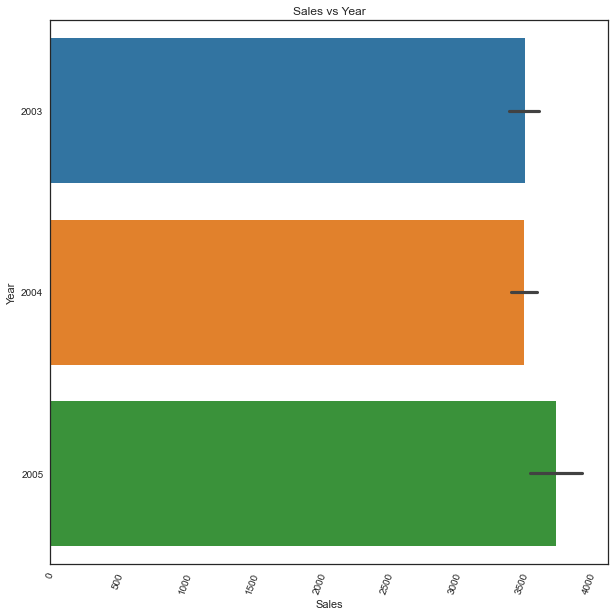

In [141]:
plt.figure(figsize = (10, 10))
sns.barplot(
    y = new_df['Year'],
    x = new_df['Sales'],
    orient="h");
plt.xticks(rotation=70);
plt.rcParams["xtick.labelsize"] = 7
plt.title('Sales vs Year')
width=50

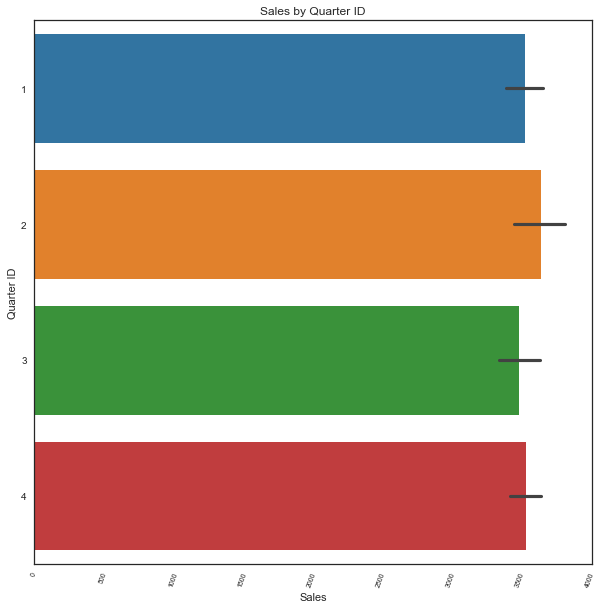

In [142]:
plt.figure(figsize = (10, 10))
sns.barplot(
    y = new_df['Quarter ID'],
    x = new_df['Sales'],
    orient="h");
plt.xticks(rotation=70);
plt.rcParams["xtick.labelsize"] = 7
plt.title('Sales by Quarter ID')
width=50

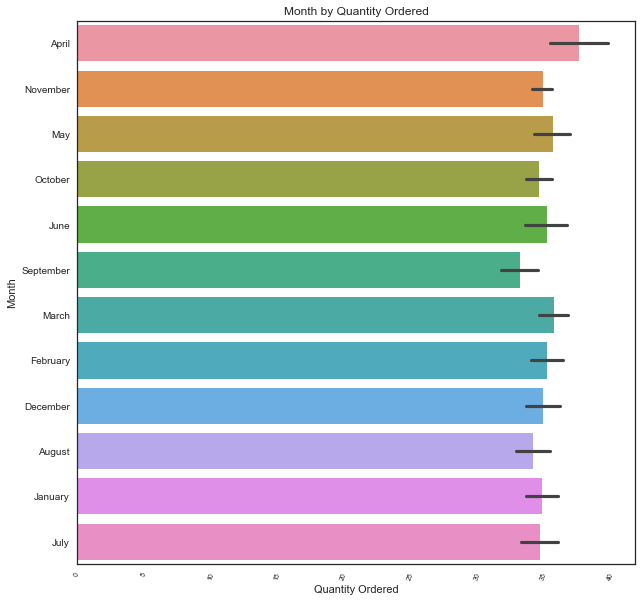

In [143]:
plt.figure(figsize = (10, 10))
sns.barplot(
    y = df_sales['Month'],
    x = df_sales['Quantity Ordered'],
    orient="h");
plt.xticks(rotation=70);
plt.rcParams["xtick.labelsize"] = 7
plt.title('Month by Quantity Ordered')
width=50

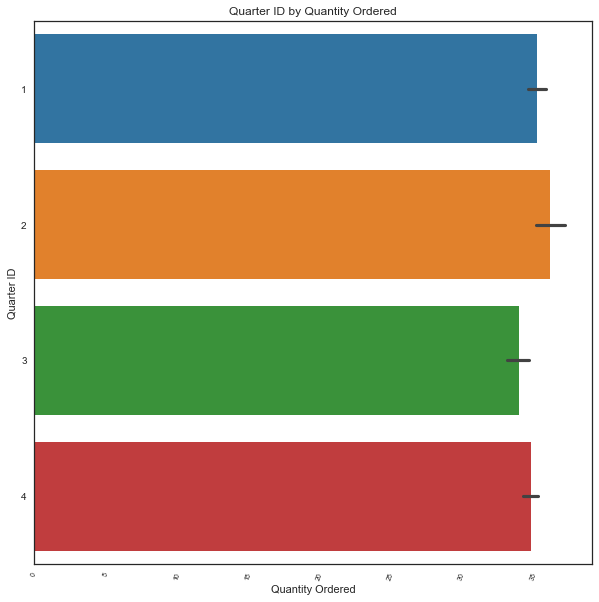

In [144]:
plt.figure(figsize = (10, 10))
sns.barplot(
    y = df_sales['Quarter ID'],
    x = df_sales['Quantity Ordered'],
    orient="h");
plt.xticks(rotation=70);
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["xtick.labelsize"] = 10
plt.title('Quarter ID by Quantity Ordered')
width=10

In [145]:
new_df.groupby(by = 'State').sum().sort_values(by = "Sales", ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
State,,,,,,,,,,,,,,,,,
N/A,5283535.71,52132,124180.19,149810.0,-25629.81,9720,3951,676.0,728.0,82.0,562.0,146.0,151.0,135.0,48.0,150.0,294.0
CA,1505542.23,14981,34468.00,41459.0,-6991.00,2772,1011,181.0,208.0,27.0,116.0,54.0,37.0,24.0,8.0,52.0,125.0
MA,666443.72,6658,15997.65,18946.0,-2948.35,1198,558,85.0,97.0,8.0,59.0,29.0,19.0,27.0,4.0,17.0,35.0
NY,646343.76,6223,15064.72,18252.0,-3187.28,1159,576,74.0,92.0,12.0,68.0,36.0,10.0,13.0,7.0,22.0,22.0
NSW,305567.11,3070,7653.90,9099.0,-1445.10,594,252,45.0,44.0,3.0,34.0,8.0,8.0,1.0,0.0,14.0,27.0


In [146]:
new_df.groupby(by = 'State').sum().sort_values(by = 'Quantity Ordered', ascending = False).head(5)

,Sales,Quantity Ordered,Price Each,MSRP,Mark Up/Down,Order Line Number,Quarter ID,Small Deal,Medium Deal,Large Deal,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
State,,,,,,,,,,,,,,,,,
N/A,5283535.71,52132,124180.19,149810.0,-25629.81,9720,3951,676.0,728.0,82.0,562.0,146.0,151.0,135.0,48.0,150.0,294.0
CA,1505542.23,14981,34468.00,41459.0,-6991.00,2772,1011,181.0,208.0,27.0,116.0,54.0,37.0,24.0,8.0,52.0,125.0
MA,666443.72,6658,15997.65,18946.0,-2948.35,1198,558,85.0,97.0,8.0,59.0,29.0,19.0,27.0,4.0,17.0,35.0
NY,646343.76,6223,15064.72,18252.0,-3187.28,1159,576,74.0,92.0,12.0,68.0,36.0,10.0,13.0,7.0,22.0,22.0
NSW,305567.11,3070,7653.90,9099.0,-1445.10,594,252,45.0,44.0,3.0,34.0,8.0,8.0,1.0,0.0,14.0,27.0


In [147]:
#df_sales = new_df.sort_values(by= "Sales", ascending = False)

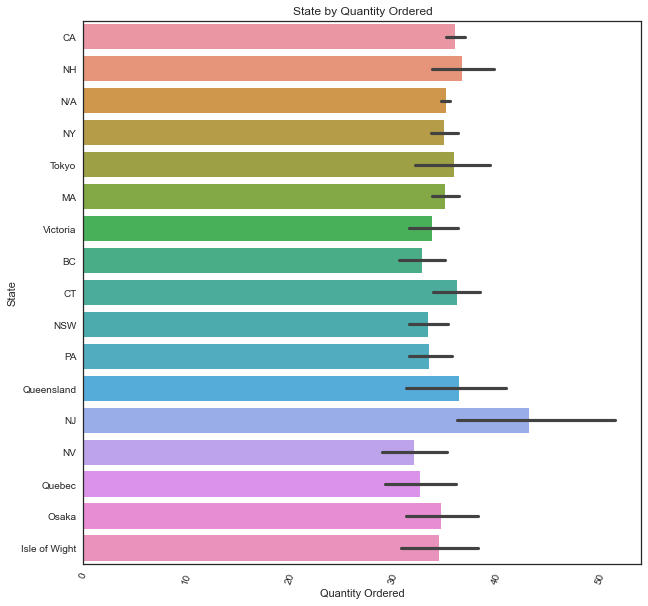

In [148]:
plt.figure(figsize = (10, 10))
sns.barplot(
    y = df_sales['State'],
    x = df_sales['Quantity Ordered'],
    orient="h");
plt.xticks(rotation=70);
plt.rcParams["xtick.labelsize"] = 7
plt.title('State by Quantity Ordered')
width=50

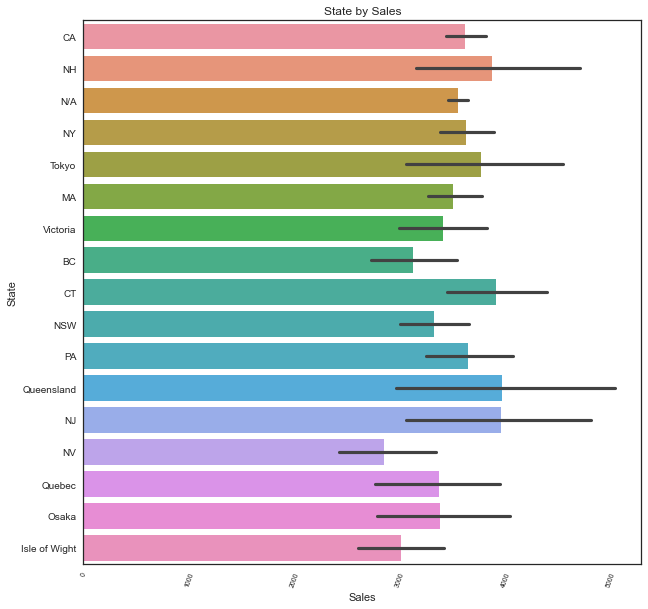

In [149]:
plt.figure(figsize = (10, 10))
sns.barplot(
    y = df_sales['State'],
    x = df_sales['Sales'],
    orient="h");
plt.xticks(rotation=70);
plt.rcParams["xtick.labelsize"] = 7
plt.title('State by Sales')
width=50

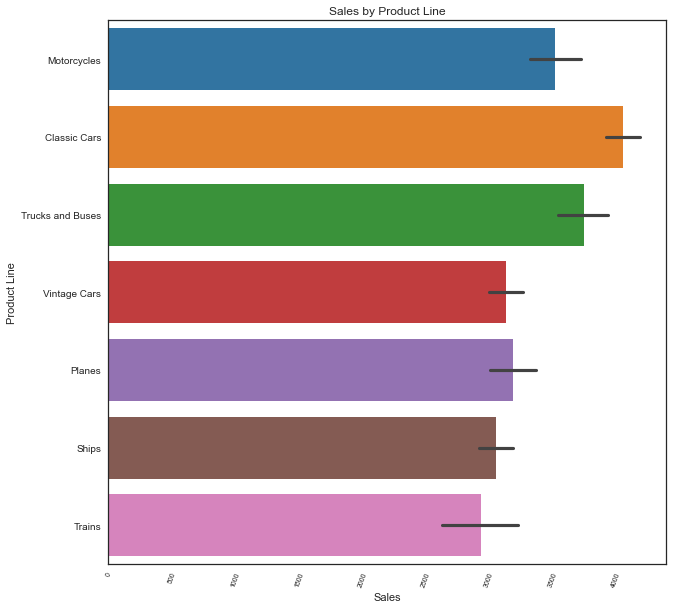

In [150]:
plt.figure(figsize = (10, 10))
sns.barplot(
    y = new_df['Product Line'],
    x = new_df['Sales'],
    orient="h");
plt.xticks(rotation=70);
plt.rcParams["xtick.labelsize"] = 7
plt.title('Sales by Product Line')
width=50

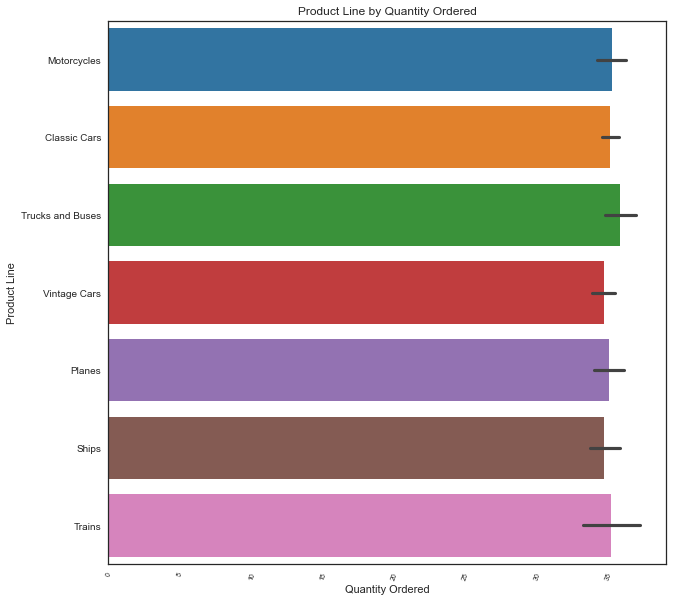

In [151]:
plt.figure(figsize = (10, 10))
sns.barplot(
    y = new_df['Product Line'],
    x = new_df['Quantity Ordered'],
    orient="h");
plt.xticks(rotation=70);
plt.rcParams["xtick.labelsize"] = 7
plt.title('Product Line by Quantity Ordered')
width=50

In [152]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    plt.figure(figsize=(12, 12))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return g

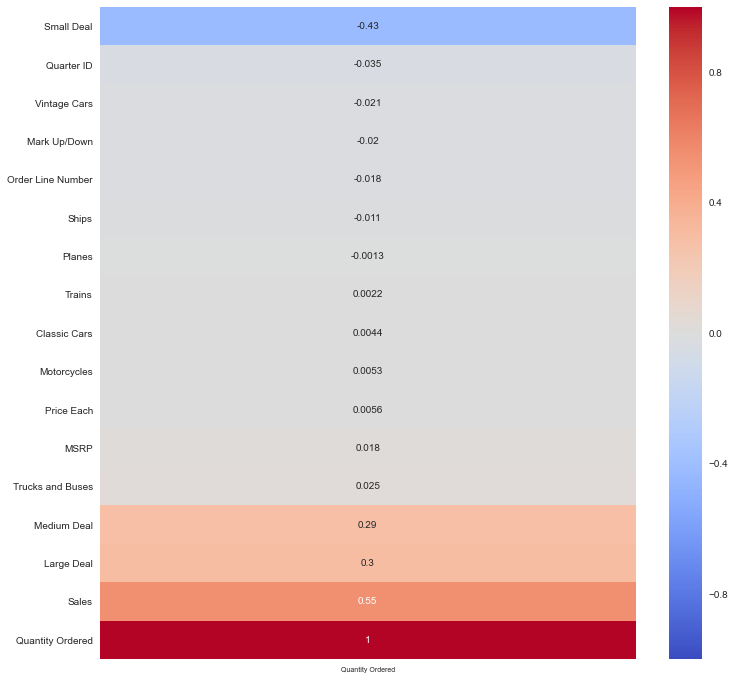

In [153]:
heatmap_numeric_w_dependent_variable(new_df, 'Quantity Ordered')

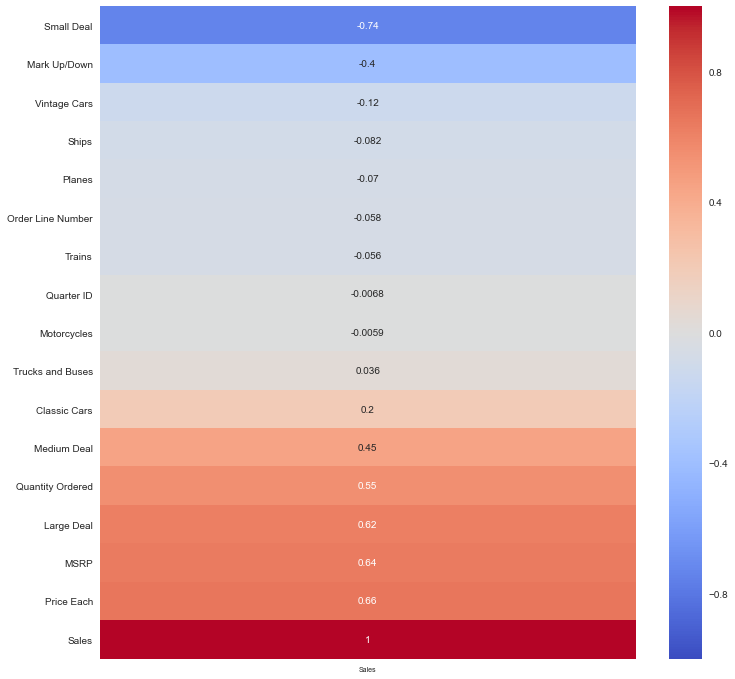

In [154]:
heatmap_numeric_w_dependent_variable(new_df, 'Sales')

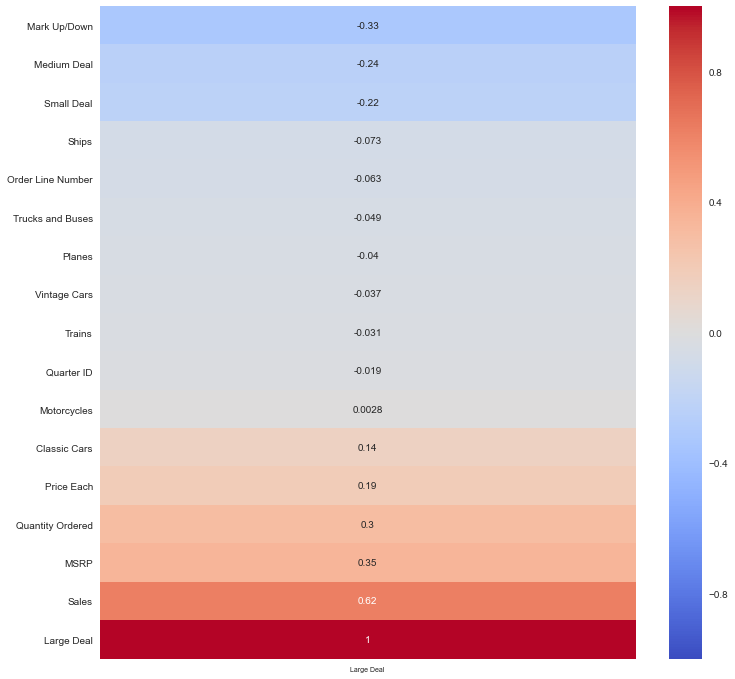

In [155]:
heatmap_numeric_w_dependent_variable(new_df, 'Large Deal')

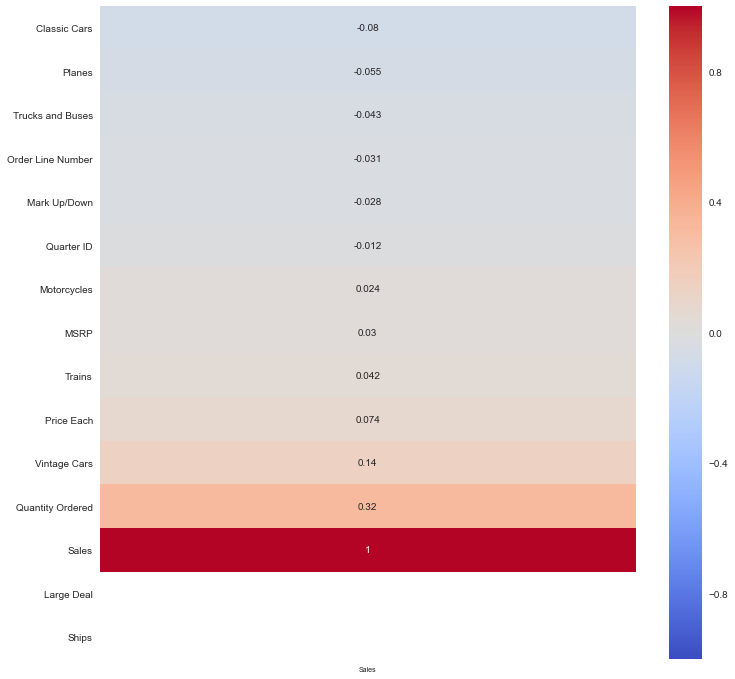

In [156]:
heatmap_numeric_w_dependent_variable(large_only, 'Sales')

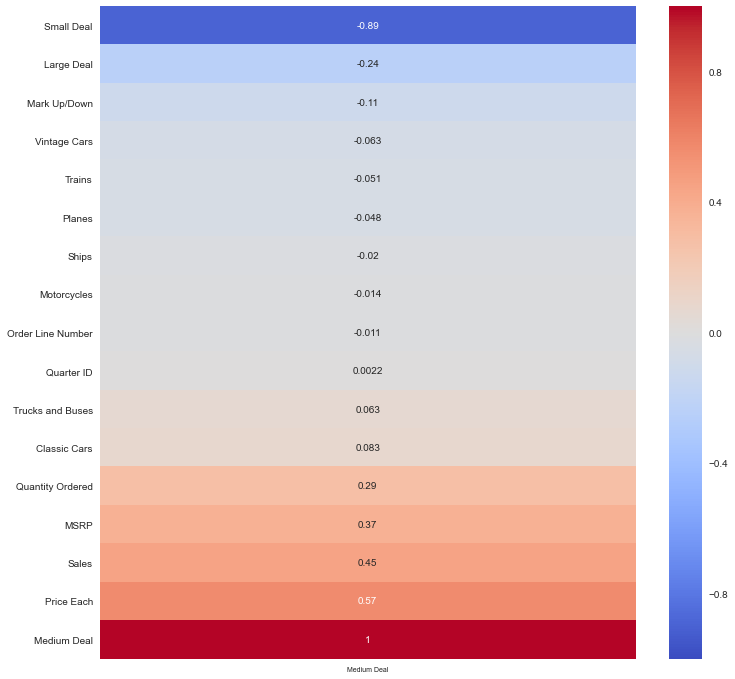

In [157]:
heatmap_numeric_w_dependent_variable(new_df, 'Medium Deal')

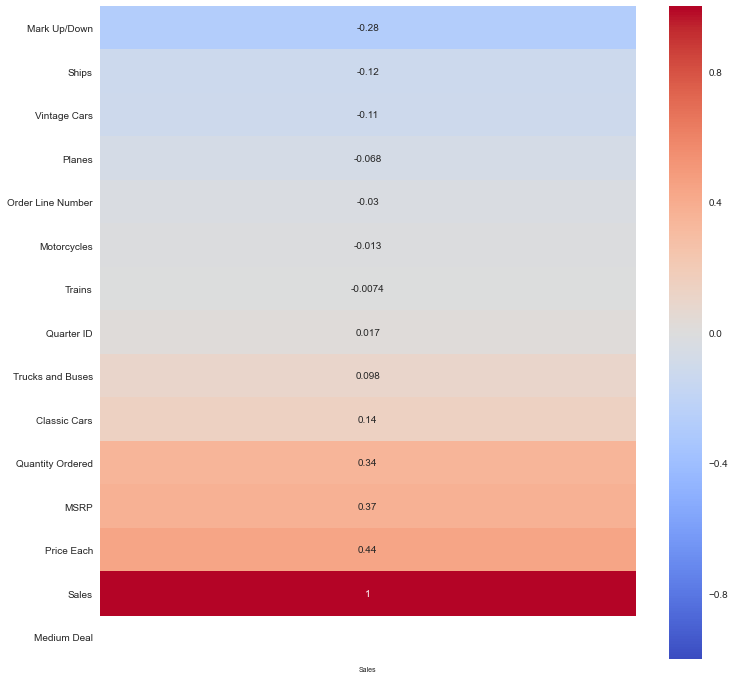

In [158]:
heatmap_numeric_w_dependent_variable(medium_only, 'Sales')

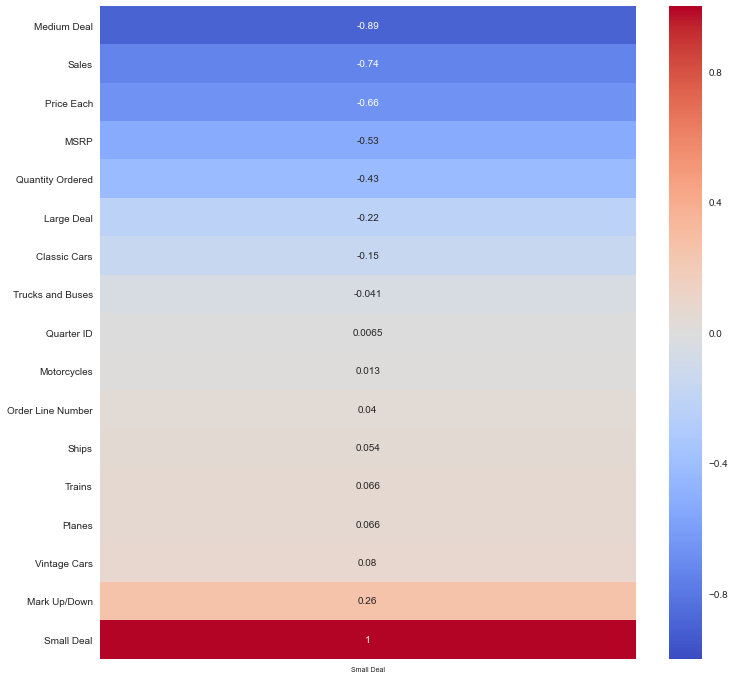

In [159]:
heatmap_numeric_w_dependent_variable(new_df, 'Small Deal')

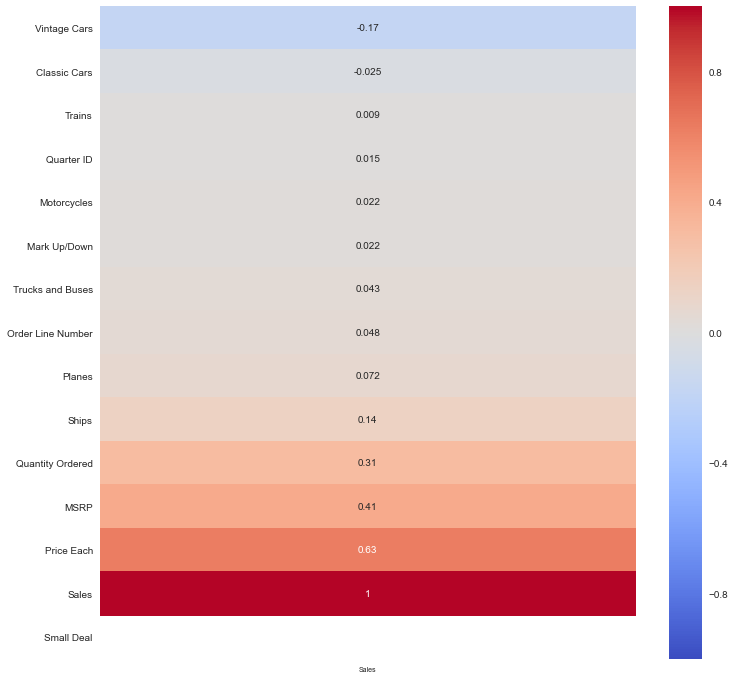

In [160]:
heatmap_numeric_w_dependent_variable(small_only, 'Sales')

## Dataframe Profiles

In [171]:
# pandas_profiling.ProfileReport(df)

In [172]:
# pandas_profiling.ProfileReport(new_df)

In [173]:
# pandas_profiling.ProfileReport(Large_Deals)

In [174]:
# pandas_profiling.ProfileReport(large_only)

In [175]:
# pandas_profiling.ProfileReport(Medium_Deals)

In [176]:
# pandas_profiling.ProfileReport(medium_only)

In [177]:
# pandas_profiling.ProfileReport(Small_Deals)

In [178]:
# pandas_profiling.ProfileReport(small_only)